# Levich and Koutechy-Levich analysis notebook for CV data.

## 1. Import needed libraries

In [1]:
from pathlib import Path
from ec4py import *
from ec4py import Quantity_Value_Unit as QV
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

## 2.Make a list of paths to the data files.

In [2]:
paths = []
path_to_dataSetFolder = Path(".").cwd().parent.parent / "test_data" /"Step"
print(path_to_dataSetFolder)
paths.append( path_to_dataSetFolder / "Steps_102346.tdms")
paths.append( path_to_dataSetFolder / "Steps_160307.tdms")
#paths.append( path_to_dataSetFolder / "Steps_112251.tdms")
 

print()

c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\Step



## 3. Load in the data files

{'Current Range': '10A', 'Control Mode': 'Current', 'Cell Switch': 'TRUE', 'Step.Type': 'h; ', 'Step.E': '1.710; ', 'Step.Time': '15.000; ', 'Repetitions': '1', 'Method.Duration': '15.0', 'Method.Cycle Duration': '15.0', 'Method.Avg.Time': '0.1', 'AC Frequency': '5.000E+3 Hz', 'AC Amplitude': '0.0500 V', 'Gas': 'None', 'Temp_0': '298.15 K', 'Temp_1': '298.15 K', 'Pressure': '100000 Pa', 'Cell Material': 'Teflon', 'CounterElectrode': '', 'Ref.Electrode': '', 'R.solution': '-1.00 Ohm', 'IR.compensation': '-1.00 Ohm', 'Electrode.Material': '', 'Electrode.Tip': '', 'Electrode.Area': '2.50E-3 m^2', 'Electrode.ExElectrode': '', 'Electrode.Cat.Loading': '6.25E+0 g m^-2', 'Electrode.Cat.Weight': '1.56E-2 g', 'Electrode.Cat.totWeight': 'Inf g', 'Electrode.Cat.w%': '0.00', 'Electrode.Cat.Serial': '', 'Electrode.Cat.Batch': '', 'Electrode.Cat.Support': '', 'Electrode.Cat.Substrate': '', 'Note': '', 'Inst.Convection': '', 'Inst.Convection.Speed': '0.0 /min', 'Inst.Convection.1': '', 'Inst.Convecti

(<matplotlib.lines.Line2D at 0x2628ced1e90>,
 <Axes: xlabel='t (s)', ylabel='E - iR vs Ag/AgCl (V)'>)

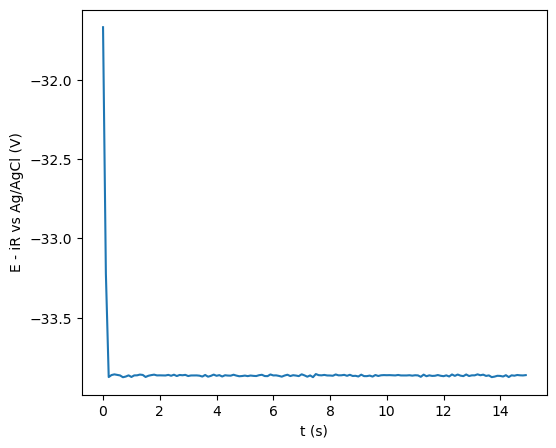

In [3]:
d= Step_Datas(paths[00],IRCORR=2) 
s=d[0]
s.RE ="Ag/AgCl"
print(s.setup)
s.plot("Time","E")
#ds= Step_Datas(paths)


(<matplotlib.lines.Line2D at 0x2628f2b7810>,
 <Axes: xlabel='t (s)', ylabel='E vs (V)'>)

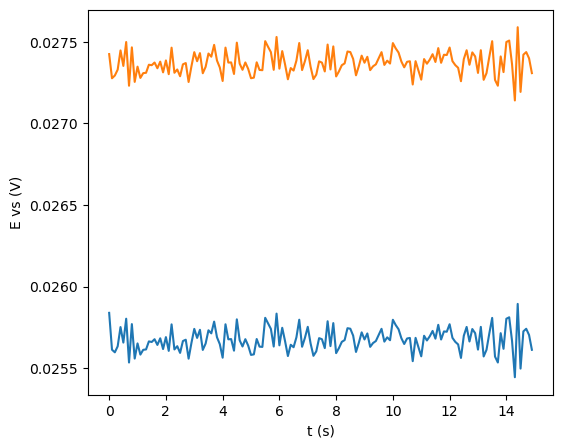

In [4]:
ds= Step_Data(paths[00], IRCORR = 0.00010 )
_,p=ds.plot("Time","E")
do= Step_Data(paths[00],  )
do.plot("Time","E",plot=p)

(<matplotlib.lines.Line2D at 0x2628f2bf9d0>,
 <Axes: xlabel='t (s)', ylabel='E vs (V)'>)

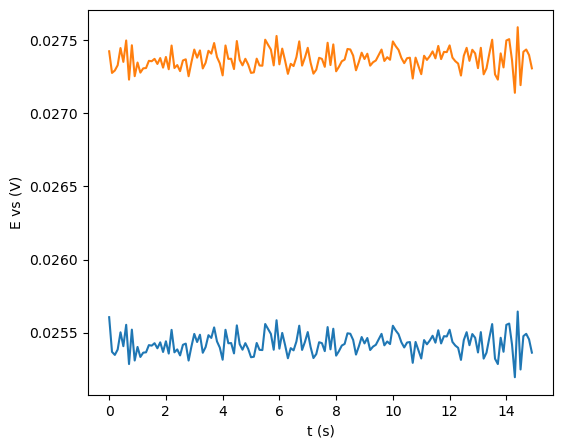

In [5]:
ds= Step_Data(paths[00], IRCORR = "ZMED" )
_,p=ds.plot("Time","E")
do= Step_Data(paths[00],  )
do.plot("Time","E",plot=p)

(<matplotlib.lines.Line2D at 0x2628f33a3d0>,
 <Axes: xlabel='t (s)', ylabel='E vs (V)'>)

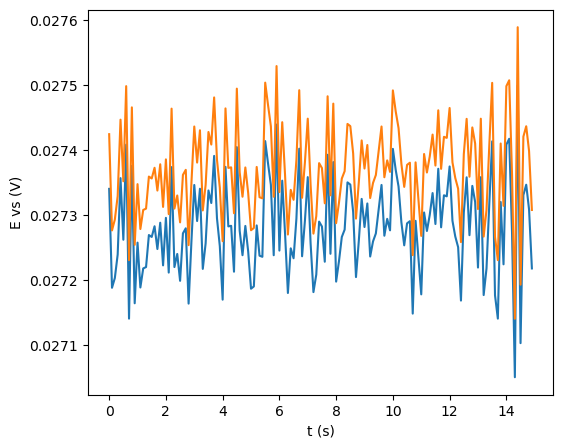

In [6]:
ds= Step_Data(paths[00], IRCORR = "RMED" )
_,p=ds.plot("Time","E")
do= Step_Data(paths[00],  )
do.plot("Time","E",plot=p)

(<matplotlib.lines.Line2D at 0x2628f3b3dd0>,
 <Axes: xlabel='t (s)', ylabel='E vs (V)'>)

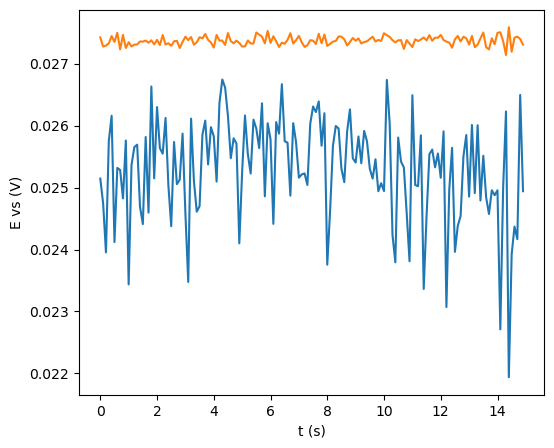

In [7]:
ds= Step_Data(paths[00], IRCORR = "Z" )
_,p=ds.plot("Time","E")
do= Step_Data(paths[00],  )
do.plot("Time","E",plot=p)

C:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\src\ec4py\util_data.py:67: UserWarning: Negative Resistance Detected. Consider using Z instead of R
  warnings.warn("Negative Resistance Detected. Consider using Z instead of R")


(<matplotlib.lines.Line2D at 0x2628f448110>,
 <Axes: xlabel='t (s)', ylabel='E vs (V)'>)

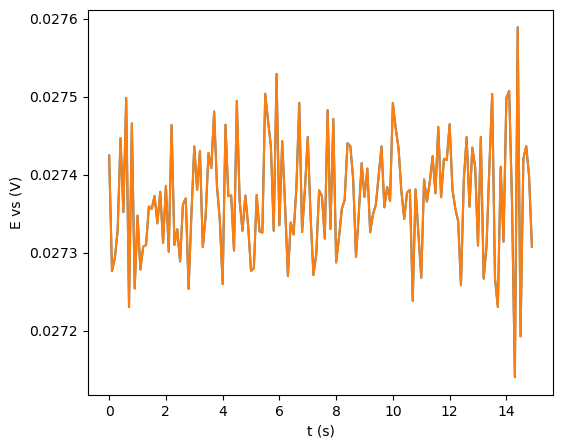

In [8]:
ds= Step_Data(paths[00], IRCORR = "R" )
_,p=ds.plot("Time","E")
do= Step_Data(paths[00],  )
do.plot("Time","E",plot=p)

[-0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35
  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75  0.8 ]
[-0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35
  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75  0.8 ]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


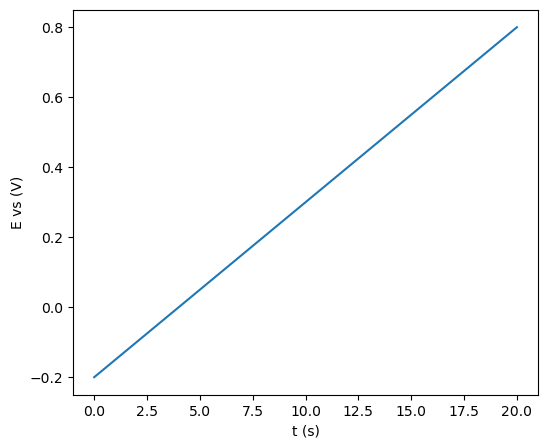

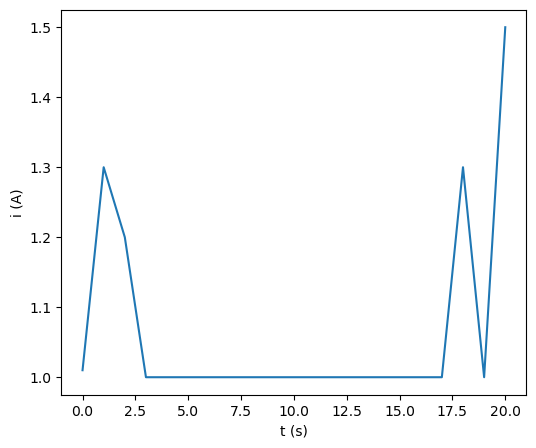

In [9]:
d = EC_Data()
dataPoints = 21
d.E = np.array(range(dataPoints))/(dataPoints-1)-0.2
d.i = np.ones(dataPoints)
d.i[0]=1.01
d.i[1]=1.3
d.i[2]=1.2
d.i[dataPoints-1]=1.5
d.i[dataPoints-2]=1.0
d.i[dataPoints-3]=1.3
d.Z_E = np.ones(dataPoints)*2
d.Phase_E = np.ones(dataPoints)*0
d.Time = np.array(range(dataPoints))
#print(d.step_Time)
d.setup
s = Step_Data()
print(d.E)
s.conv(d)
print(s.E)
print(s.Time)
l,p = s.plot("Time","E")
l,p = s.plot("Time","i")


In [10]:
print(s.E)
s0 =s.get_step(0)
print("step",s0.E)
lsv = s.export_to_lsv(0)
#print(lsv.E)
lsv.plot()
lsv.get_i_at_E(0.8)
#a = lsv.i

[-0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35
  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75  0.8 ]
step [-0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35
  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75  0.8 ]


TypeError: plot_options.__init__() takes 1 positional argument but 2 were given

[nan nan nan ... nan nan nan]


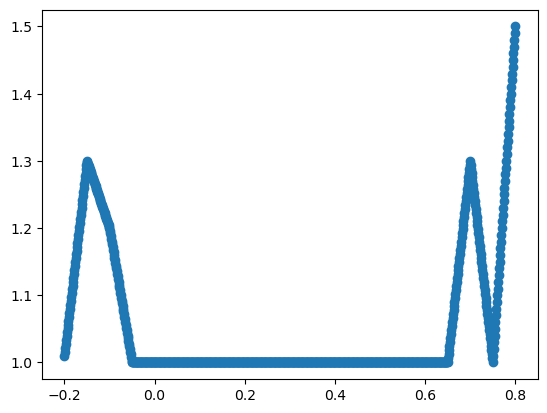

In [ ]:
a= lsv.interpolate(s.E,s.i)
b= lsv.clean_up_edges(a)
print(a)
plt.plot(lsv.E,b,"o")


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5]
[-0.2  -0.2  -0.2  -0.2  -0.2  -0.2  -0.15 -0.1  -0.05  0.    0.05  0.1
  0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7
  0.75  0.8   0.75  0.7   0.65  0.6   0.55  0.5   0.45  0.4   0.35  0.3
  0.25  0.2   0.15  0.1   0.05  0.   -0.05 -0.1  -0.15 -0.2 ]
[-0.2  -0.2  -0.2  -0.2  -0.2  -0.2  -0.15 -0.1  -0.05  0.    0.05  0.1
  0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7
  0.75  0.8   0.75  0.7   0.65  0.6   0.55  0.5   0.45  0.4   0.35  0.3
  0.25  0.2   0.15  0.1   0.05  0.   -0.05 -0.1  -0.15 -0.2 ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5]
3


(<matplotlib.lines.Line2D at 0x2bcbed76510>,
 <Axes: xlabel='E vs (V)', ylabel='i (A)'>)

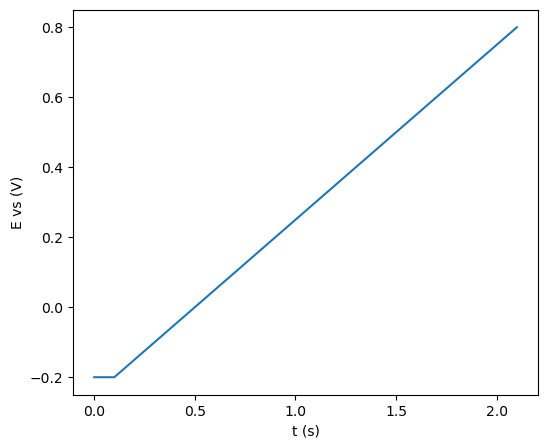

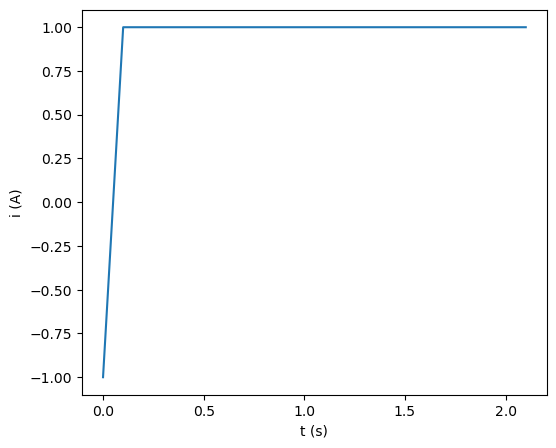

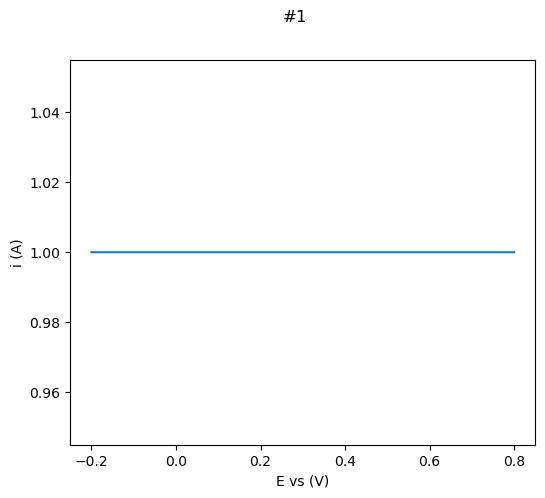

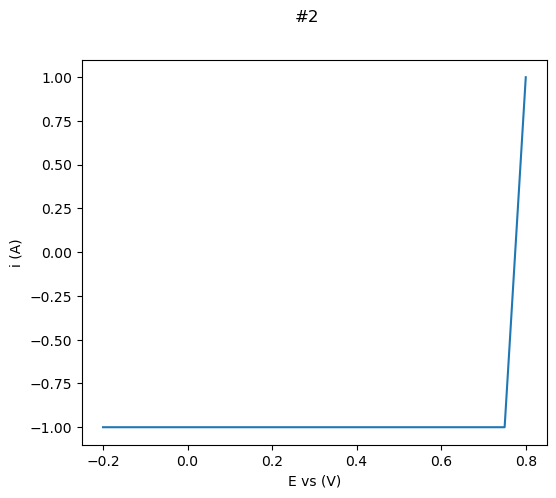

In [ ]:
d = EC_Data()
dataPoints = 21
start_E = -0.2
d.E = np.array(range(dataPoints))/(dataPoints-1)+start_E
d.E = np.append(d.E,np.array(range(dataPoints-2,-1,-1))/(dataPoints-1)+start_E)
d.E = np.append(np.ones(5)*start_E,d.E)
#print(d.E)
d.i = np.append(np.ones(dataPoints),np.ones(dataPoints)*-1)
d.i = np.append(np.ones(5)*-1,d.i)
d.Z_E = np.ones(dataPoints*2-1+5)*2
d.Phase_E = np.ones(dataPoints*2-1+5)*0
dt = 0.1
d.Time = np.array(range(dataPoints*2-1+5))*dt
d.setup["Step.Time"] = f"{5*dt};{dataPoints*dt};{dataPoints*dt};"
d.setup["Step.E"] =     f"{d.E[0]};{max(d.E)};{d.E[dataPoints-1]}"
d.setup["Step.Type"] = "h;r;r;"
print(d.Time)
d.setup
s = Step_Data()
print(d.E)
s.conv(d)
print(s.E)
print(s.Time)
print(s.nr_of_steps)
s0 =s.get_step(1)
l,p = s0.plot("Time","E")
l,p = s0.plot("Time","i")
lsv1 = s.export_to_lsv(1)
lsv2 = s.export_to_lsv(2)
lsv1.plot()
lsv2.plot() 